In [3]:
%matplotlib inline
import FRAMey
reload(FRAMey)

<module 'FRAMey' from 'FRAMey/__init__.pyc'>

In [4]:
!cp examples/demo\ Untargeted_HILIC_UPLC\ addl\ info\ test.csv .

# Feature reduction assistant for metabalomics
### NIST Marine ESB Data Tool Development
### FRAMey v0.1: last update November 2017

---

* Timestamp: 2017-11-14 15:04:30.277422
* User: wpk
* Input data: /Users/wpk/Documents/python/projects/FRAMey/demo Untargeted_HILIC_UPLC addl info test.csv

---



* **Total Features:** 7383
* **Removed Features:** 4302
* **Kept Features:** 3081


* 1601 features removed due to blank contribution **>5.0%** of mean QC feature area
* 400 features removed due to presence in **<=60.0%** of QC samples
* 1592 features removed due to QC RSD **>=20.0%** 
* 2551 features removed due to presence in **<=80.0%** of biological samples
* 373 features removed due to  RSD ratios between biological and QC samples **<120.0%** 
* 1093 features removed due to median area in biological samples **<=10.0*LOQ** 
* 1220 features removed due to median area in biological samples **<=50.0*LOQ** 

* The reduced dataset containing features passing all filters has been saved to: /Users/wpk/Documents/python/projects/FRAMey/demo Untargeted_HILIC_UPLC addl info test_features_excluded.csv
* A dataset containing features removed by filters has been saved to: /Users/wpk/Documents/python/projects/FRAMey/demo Untargeted_HILIC_UPLC addl info test_features_remaining.csv
---


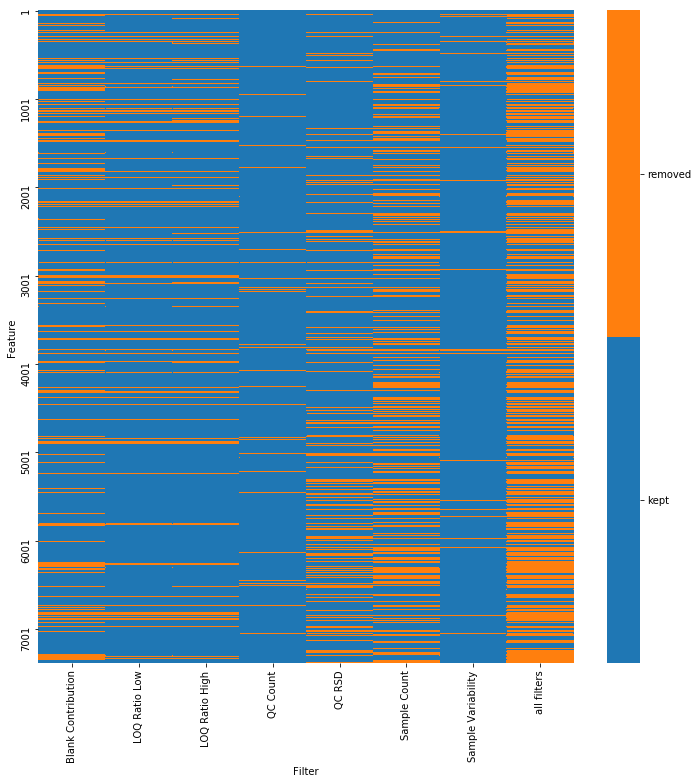


**Figure 1:** Visual expression of feature filtration by category.

---


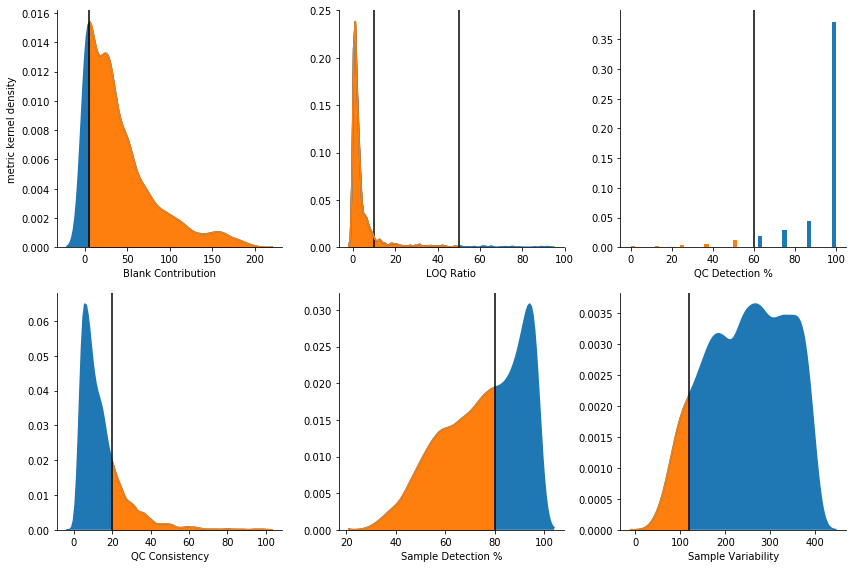


**Figure 2:** Details of filter application effect. Density of occurrence for each filter metric. Red lines indicate the chosen quality thresholds. Only a reasonable range of the density curves are shown.

---


In [5]:
f = FRAMey.full_analysis('./demo Untargeted_HILIC_UPLC addl info test.csv')

# Feature reduction assistant for metabalomics
### NIST Marine ESB Data Tool Development
### FRAMey v0.1: last update November 2017

---

* Timestamp: 2017-11-14 11:58:24.186921
* User: wpk
* Input data: 

---



* **Total Features:** 7383
* **Removed Features:** 4272
* **Kept Features:** 3111


* 1481 features removed due to blank contribution **>10.0%** of mean QC feature area
* 400 features removed due to presence in **<=60.0%** of QC samples
* 1592 features removed due to QC RSD **>=20.0%** 
* 2551 features removed due to presence in **<=80.0%** of biological samples
* 373 features removed due to  RSD ratios between biological and QC samples **<120.0%** 
* 1093 features removed due to median area in biological samples **<=10.0*LOQ** 
* 1220 features removed due to median area in biological samples **<=50.0*LOQ** 

* The reduced dataset containing features passing all filters has been saved to: /Users/wpk/Documents/python/projects/FRAMey/demo Untargeted_HILIC_UPLC addl info test_remove.csv
* A dataset containing features removed by filters has been saved to: /Users/wpk/Documents/python/projects/FRAMey/demo Untargeted_HILIC_UPLC addl info test_keep.csv
---


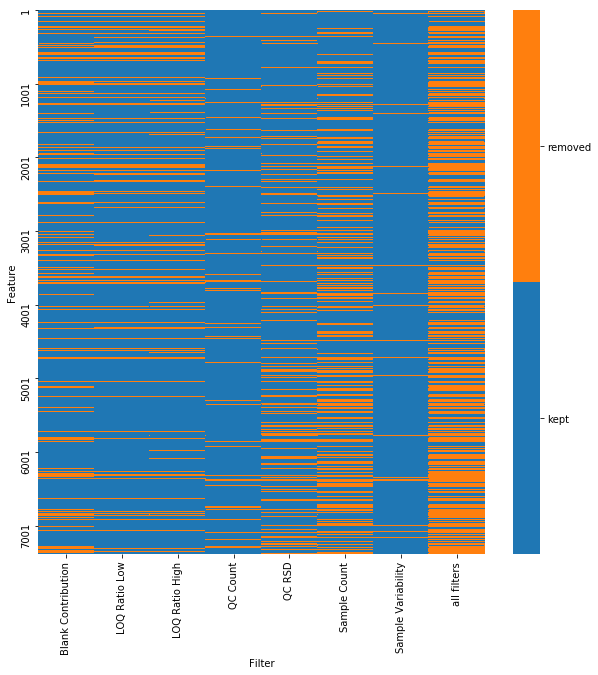


**Figure 1:** Visual expression of feature filtration by category.

---


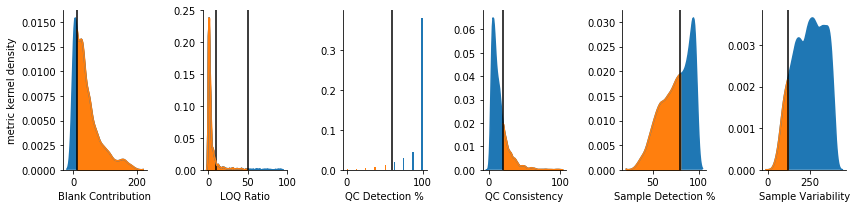


**Figure 2:** Details of filter application effect. Density of occurrence for each filter metric. Red lines indicate the chosen quality thresholds. Only a reasonable range of the density curves are shown.

---


In [11]:
path = './demo Untargeted_HILIC_UPLC addl info test.csv'
f = FRAMey.FRAMe.from_input_Rfile(path, info_columns=['Info'],  blank_contribution=10.0)
f.summary(ofile_keep=path.rstrip('.csv')+'_keep.csv', ofile_remove=path.rstrip('.csv')+'_remove.csv')

In [3]:
df = FRAMey.read_input('examples/demo Untargeted_HILIC_UPLC addl info test.csv', col_to_numeric=False)
f = FRAMey.FRAMe(df, info_columns=['Info'])

# or
#f = FRAMey.FRAMe.from_input_Rfile('./examples/demo Untargeted_HILIC_UPLC addl info test.csv', info_columns=['Info'])


,removed,filter,,
0,1601,Blank Contribution,>,5.0%
1,400,QC Count,<=,60.0%
2,1592,QC RSD,>=,20.0%
3,2551,Sample Count,<=,80.0%
4,373,Sample Variability,<,120.0%
5,1093,LOQ Ratio Low,<=,10.0*LOQ
6,1220,LOQ Ratio High,<=,50.0*LOQ


1 loop, best of 1: 2.49 s per loop


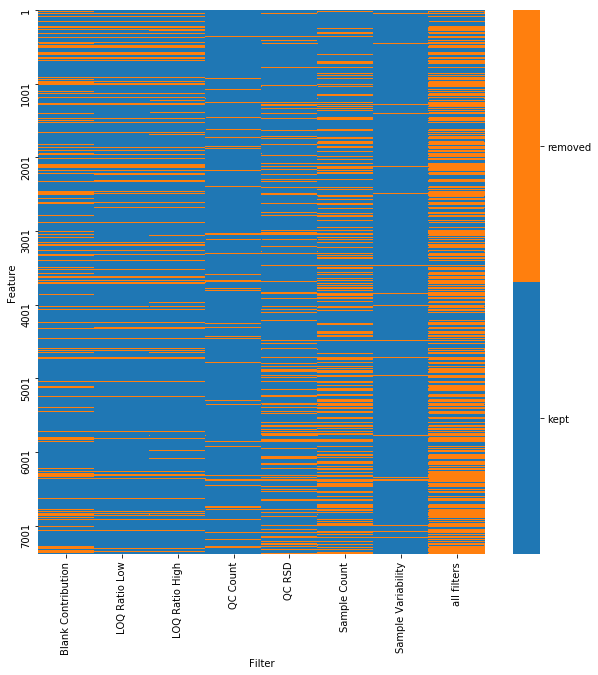

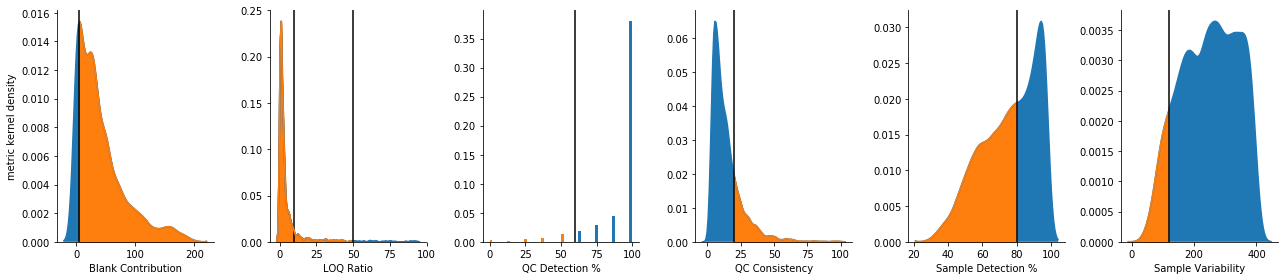

In [4]:
%%timeit -n 1 -r 1
df = FRAMey.read_input('examples/demo Untargeted_HILIC_UPLC addl info test.csv', col_to_numeric=False)
f = FRAMey.FRAMe(df, info_columns=['Info'])

# or
f = FRAMey.FRAMe.from_input_Rfile('./examples/demo Untargeted_HILIC_UPLC addl info test.csv', info_columns=['Info'])

display(f.summary_remove)
f.map_remove()

a = f.plot_dist(width_per=3, height=4)

f.table_keep.to_csv('keep.csv')
f.table_remove.to_csv('remove.csv')

In [5]:
# test that exclude/remain files are the same

In [5]:
df_remove= FRAMey.read_input('examples/demo Untargeted_HILIC_UPLC addl info test_features_excluded.csv')
df_keep = FRAMey.read_input('examples/demo Untargeted_HILIC_UPLC addl info test_features_remaining.csv')

In [6]:
print((df_remove.fillna(-10.0) != f.table_remove[df_remove.columns].fillna(-10.0)).sum())

print((df_keep.fillna(-10.0) != f.table_keep[df_keep.columns].fillna(-10.0)).sum())

Sample  Class             
Info    m/z                   0
        RT                    0
Filter  Blank Contribution    0
        Sample Variability    0
        Sample Count          0
        QC Count              0
        QC RSD                0
        LOQ Ratio Low         0
        LOQ Ratio High        0
4       Blank                 0
5       QC                    0
6       QC                    0
7       QC                    0
8       Class 3               0
9       Class 1               0
10      Class 2               0
11      Class 1               0
12      Class 3               0
13      Class 3               0
14      QC                    0
15      Class 4               0
16      Class 2               0
17      Class 4               0
18      Class 3               0
19      Class 4               0
20      Class 4               0
21      QC                    0
22      Class 1               0
23      Class 1               0
24      Class 1               0
25      Class